<a href="https://colab.research.google.com/github/nasibehmohammadi/Thesis/blob/main/1NN_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

file_path = "/content/d1.csv"
df = pd.read_csv(file_path)

feature_columns = ["B", "C", "D", "E", "F", "G", "H", "I", "J"]
target_column = "A"

X = df[feature_columns].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ دقت مدل: {accuracy * 100:.2f}%")
print(f"🎯 F1-Score: {f1:.4f}")
print("\n📊 گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


820/820 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9400 - loss: 0.2747 - val_accuracy: 0.9437 - val_loss: 0.2197
Epoch 2/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9377 - loss: 0.2392 - val_accuracy: 0.9437 - val_loss: 0.2155
Epoch 3/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9409 - loss: 0.2253 - val_accuracy: 0.9437 - val_loss: 0.2155
Epoch 4/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9439 - loss: 0.2151 - val_accuracy: 0.9437 - val_loss: 0.2132
Epoch 5/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9420 - loss: 0.2192 - val_accuracy: 0.9437 - val_loss: 0.2132
Epoch 6/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9418 - loss: 0.2176 - val_accuracy: 0.9437 - val_loss: 0.2127
Epoch 7/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9427 - loss: 0.2152 - val_accuracy: 0.9437 - val_loss: 0.2147
Epoch 8/10
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9392 - loss: 0.2235 - val_accuracy: 0.9437 - val_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


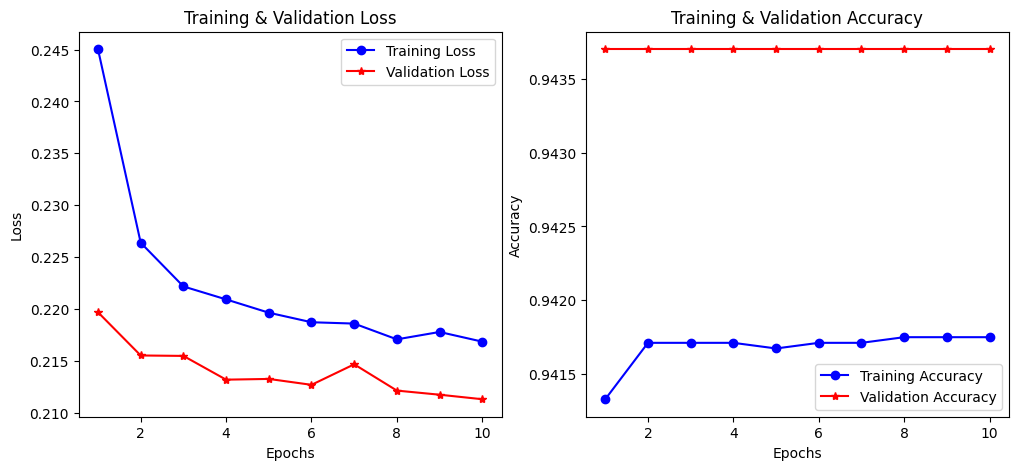

Training Accuracy: 0.9418 | Validation Accuracy: 0.9437
Training Loss: 0.2168 | Validation Loss: 0.2113
✅ مدل در وضعیت خوبی قرار دارد.


In [ ]:
import matplotlib.pyplot as plt

# رسم نمودار دقت و خطا
def plot_training_history(history):
    epochs = range(1, len(history.history['loss']) + 1)

    # رسم نمودار خطا (Loss)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r*-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')

    # رسم نمودار دقت (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r*-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')

    plt.show()

# بررسی بیش‌برازش
def check_overfitting(history):
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]

    print(f"Training Accuracy: {train_acc:.4f} | Validation Accuracy: {val_acc:.4f}")
    print(f"Training Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")

    if (val_acc < train_acc - 0.05) or (val_loss > train_loss + 0.05):
        print("⚠️ احتمال بیش‌برازش وجود دارد!")
    else:
        print("✅ مدل در وضعیت خوبی قرار دارد.")

# اجرای توابع
plot_training_history(history)
check_overfitting(history)
